# Pyber Analysis

* Urban cities tend to have highest concentration of drivers, high ride count and low fares. Rural cities tend to have lesser number of drivers and rides along with higher fares. Suburban cities fall in-between on all three measures.

* Total number of rides correlates reasonably well with the total fare across city types.

* Rural and Suburban cities are highly profitable - 2.6% of Pyber drivers are in Rural cities generating 6.8% of Pyber fare revenue. 16.5% of Pyber drivers are in Suburban cities generating 30.5% Pyber fare revenue.

* High availabity of drivers in Urban cities is lowering the average fare and profitability - 80.9% of Pyber drivers are in Urban cities generating only 62.7% of Pyber fare revenue. This is because Urban cities only get 68.4% of the rides.
---

### Dependencies and Setup
* Import matplotlib, pandas and numpy
* dfheader_remove_upper_space : Function to cleanup column names i.e lowercase with underscores

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# define useful functions
def dfheader_remove_upper_space(df):
    '''
    change column names of dataframe to lowercase with underscores
    '''
    # get list of column names
    oldcol = list(df.columns.values)
    # convert each column name to lowercase and replace space with underscore
    newcol = [s.lower().replace(' ', '_') for s in oldcol]
    # create a rename dict with the above
    rendict = dict(zip(oldcol, newcol))
    # return renamed dataframe
    return(df.rename(columns = rendict))
##end dfheader_remove_upper_space(df)

## Import Data
* Open City and Rider Data Files. Store into Pandas dataframe
* Combine the two into a single dataframe

In [2]:
# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cd = dfheader_remove_upper_space(pd.read_csv(city_data_to_load))
rd = dfheader_remove_upper_space(pd.read_csv(ride_data_to_load))

# Combine the data into a single dataset
pyber = pd.merge(rd, cd, how="left", on=["city", "city"])
pyber = pyber.rename(columns={'type': 'city_type'})
# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,city_type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## City Type and City Summary
* Group the data by City Type and City
* Create new summary dataframe (multi-index) to capture: Number of Rides, Average Fare and Driver Count

In [3]:
city_grp = pyber.groupby(['city_type', 'city'])
cityfare = pd.DataFrame({'num_rides' : city_grp.ride_id.count(),
                         'avg_fare': city_grp.fare.mean(),
                         'driver_count' : city_grp.driver_count.mean()})

cityfare.reindex()
cityfare.head()

num_rides   avg_fare  driver_count
city_type city                                              
Rural     Bradshawfurt           10  40.064000             7
          Garzaport               3  24.123333             7
          Harringtonfort          6  33.470000             4
          Jessicaport             6  36.013333             1
          Lake Jamie              6  34.358333             4

### Define Useful Function
* pyber_scatter - Generates a scatter plot of Average Fare vs Number of Rides for a given City Type. The bubble-size in the plot scales by the Driver Count

In [4]:
def pyber_scatter(midf, ctype, c, x):
    '''
    Create a scatter plot of Average Fare vs Number of Rides for a given City Type.
    Bubble size scales by the Driver Count
    Bubble color specified in input c.
    Transparency is 0.7.
    '''
    df = midf.loc[ctype]
    df.plot.scatter(x='num_rides',
                    y='avg_fare',
                    s=15*df.driver_count.values,
                    label=ctype,
                    grid=True,
                    color=c, 
                    edgecolors='black',
                    alpha=0.7,
                    ax=x)
##end pyber_scatter(midf, ctype, c, x)

## Bubble Plot of Ride Sharing Data

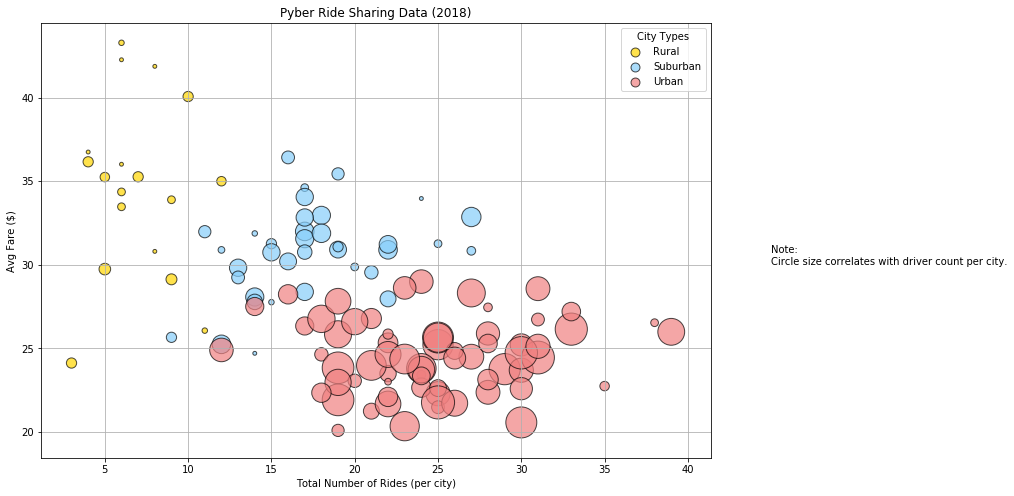

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
# Pyber color-scheme
colorlist = ['gold', 'lightskyblue', 'lightcoral']

# Build the scatter plots for each of the city types
for i,j in enumerate(cityfare.index.levels[0]):
    pyber_scatter(cityfare, j, colorlist[i], ax)

# Set the Title and X/Y labels
ax.set_title('Pyber Ride Sharing Data (2018)')
ax.set_xlabel('Total Number of Rides (per city)')
ax.set_ylabel('Avg Fare ($)')

# Create a legend
lgd = ax.legend(loc='best', title='City Types')
# Resize the legend bubbles
for handle in lgd.legendHandles:
    handle.set_sizes([80.0])

# Incorporate a text label regarding circle size
ax.text(x=45, y=30, s='Note:\nCircle size correlates with driver count per city.')

# Display plot
plt.show()

## City Type Summary
* Create new summary dataframe to capture: Number of Rides, Total Fare and Driver Count for each City Type.

In [6]:
startangle = 150
explosion = (0, 0, 0.1)
percformat = '%1.1f%%'
aspect = 0.65
type_summary = pd.DataFrame({'total_fares' : city_grp.fare.sum().sum(level='city_type'),
                             'total_rides' : city_grp.ride_id.count().sum(level='city_type'),
                             'total_drivers' : city_grp.driver_count.mean().sum(level='city_type')})
type_summary.head()

,total_fares,total_rides,total_drivers
city_type,,,
Rural,4327.93,125,78
Suburban,19356.33,625,490
Urban,39854.38,1625,2405


### Define Useful Functions
* pyber_pie : Generates Pie Chart of City Types for a given column. If no column specified, generates subplots corresponding to each column.
* pyber_pie_properties : Set Title and Aspect Ratio for subplot. Remove Y label and Legend.
* pyber_pie_title : Create Title string from column name.

In [7]:
def pyber_pie_title(col):
    tstr = ' '.join(col.split('_'))
    return(f'% of {tstr.title()} by City Type')
##end pyber_pie_title(col)

def pyber_pie_properties(ax, col, asp):
    '''
    Set title and aspect ratio for the pie chart
    Remove Y label and Legend
    '''
    # Set the title using column name
    ax.set_title(pyber_pie_title(col))
    # Remove the Y label and legend box
    ax.set_ylabel('')
    ax.get_legend().remove()
    # Set an aspect ratio to give a "tilt effect"
    ax.set_aspect(asp)
##end pyber_pie_properties(ax, col, asp)

def pyber_pie(df, col, clist, sa, exp, aperc, asp):
    '''
    Creates Pie Chart with each slice representing the data in a given column for each City Type.
    If no column specified, create subplots corresponding to each column.
    '''
    # If column not specified, set flag to indicate subplots
    sp = (col == None)
    # Adjust size accordingly. If single chart - (6, 6). 
    # If multiple subplots, multiply x-dimension accordingly
    fs = (6 * (1 + sp*2), 6)

    # Create the pie chart
    ax = df.plot.pie(y=col,
                     subplots=sp,
                     shadow=True,
                     autopct=aperc,
                     colors=clist,
                     startangle=sa,
                     explode=exp,
                     figsize=fs)

    # Setup other properties like Title, Aspect Ratio, etc.
    if sp:
        # If multiple subplots, setup properties for each
        for i,c in enumerate(df.columns):
            pyber_pie_properties(ax[i], c, asp)
        plt.tight_layout()
    else:
        pyber_pie_properties(ax, col, asp)

    plt.show()
##end pyber_pie(df, col, clist, sa, exp, aperc, asp)

## Total Fares by City Type

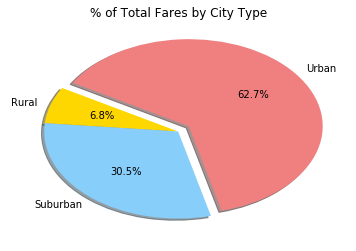

In [8]:
pyber_pie(type_summary, 'total_fares', colorlist, startangle, explosion, percformat, aspect)

## Total Rides by City Type

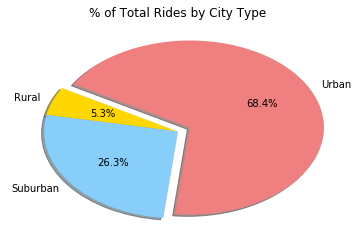

In [9]:
pyber_pie(type_summary, 'total_rides', colorlist, startangle, explosion, percformat, aspect)

## Total Drivers by City Type

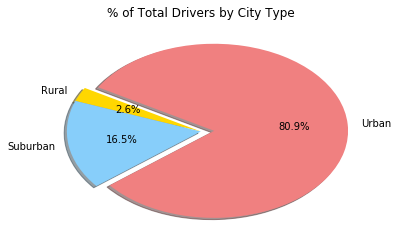

In [10]:
pyber_pie(type_summary, 'total_drivers', colorlist, startangle, explosion, percformat, aspect)

## City Type Analysis - Side By Side

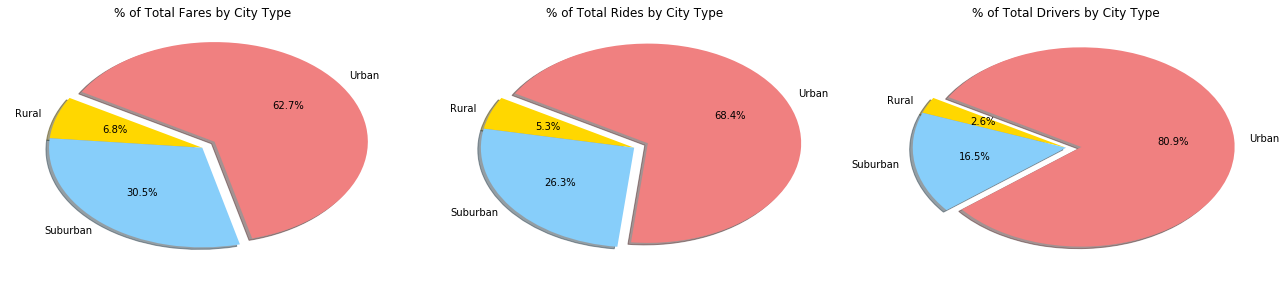

In [11]:
pyber_pie(type_summary, None, colorlist, startangle, explosion, percformat, aspect)